# Bellcore data transference analisys

* Caio Everest - caioeverest@edu.unirio.br
* Cesar - cesar@edu.unirio.br

## imports

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import norm

## read file and set columns identifiers

In [2]:
path_file = 'bellcore_data.csv'
df = pd.read_csv(path_file,header=None)
df.columns = ['time', 'package_size']
df.describe()

,time,package_size
count,13107.000000,13107.000000
mean,21.046862,657.022889
std,11.043100,586.662403
min,0.017716,64.000000
25%,11.290324,133.000000
50%,23.519164,174.000000
75%,30.037934,1090.000000
max,38.706900,1518.000000


In [3]:
df.time = pd.to_timedelta(df.time, unit="s")
df.set_index("time",inplace=True)

## Package size

In [4]:
ps_array = np.array(df.package_size)

### Plot histogram of PackageSize

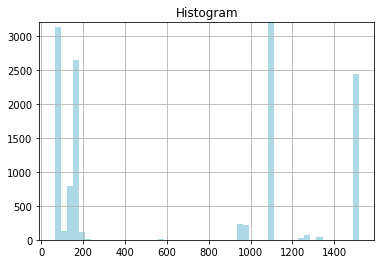

In [5]:
ps_hx, ps_hy, _ = plt.hist(ps_array, bins=50, color="lightblue")

plt.ylim(0.0,max(ps_hx)+0.05)
plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Apply cumulative sum function 

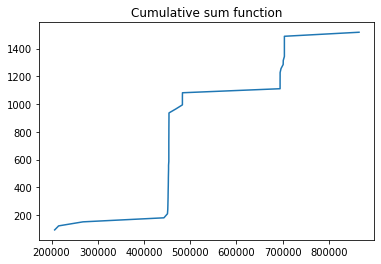

In [50]:
ps_dx = ps_hx[1] - ps_hy[0]
ps_cumsum = np.cumsum(ps_hx)*ps_dx

plt.plot(ps_cumsum, ps_hy[1:])

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Normal

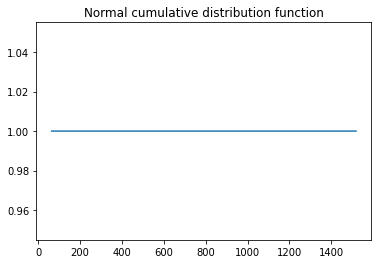

In [7]:
ps_x = np.linspace(df.package_size.min(),df.package_size.max(),df.package_size.size)
#ps_y = norm.cdf(ps_array, ps_mean, ps_std)
ps_y = norm.cdf(ps_array)

plt.plot(ps_x, ps_y)

plt.title('Normal cumulative distribution function')

plt.show()
plt.close()

In [51]:
df_100ms = df.package_size.resample('100ms').sum()
df_1s = df.package_size.resample('1s').sum()
df_10s = df.package_size.resample('10s').sum()

In [52]:
df_100ms.describe()

count      387.000000
mean     22252.193798
std      14748.435576
min        334.000000
25%      11253.000000
50%      19006.000000
75%      30345.500000
max      68705.000000
Name: package_size, dtype: float64

In [53]:
df_1s.describe()

count        39.000000
mean     220810.230769
std       92815.903415
min       44885.000000
25%      141817.000000
50%      204622.000000
75%      319934.000000
max      373018.000000
Name: package_size, dtype: float64

In [54]:
df_10s.describe()

count    4.000000e+00
mean     2.152900e+06
std      6.179732e+05
min      1.480613e+06
25%      1.827703e+06
50%      2.087959e+06
75%      2.413156e+06
max      2.955068e+06
Name: package_size, dtype: float64

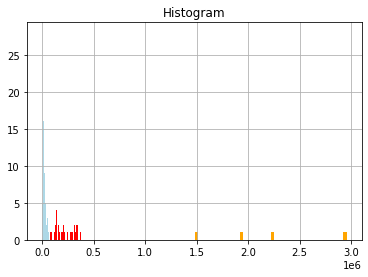

In [12]:
d100ms_hx, d100ms_hy, _ = plt.hist(df_100ms, bins=50, color="lightblue")
d1s_hx, d1s_hy, _ = plt.hist(df_1s, bins=50, color="red")
d1s_hx, d1s_hy, _ = plt.hist(df_10s, bins=50, color="orange")

plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

## 100ms

### Histogram

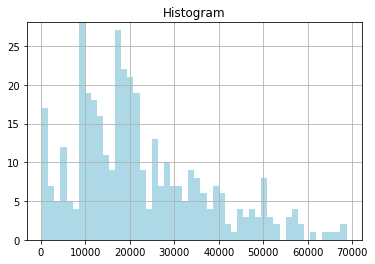

In [13]:
d100ms_hx, d100ms_hy, _ = plt.hist(df_100ms, bins=50, color="lightblue")

plt.ylim(0.0,max(d100ms_hx)+0.05)
plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Cumulative sum function

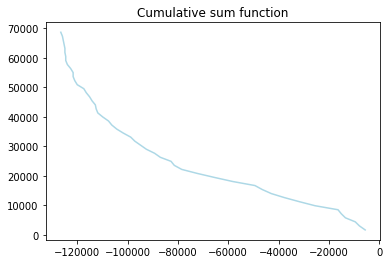

In [45]:
dx = d100ms_hx[1] - d100ms_hy[0]
ps_100ms_cumsum = np.cumsum(d100ms_hx)*dx

plt.plot(ps_100ms_cumsum, d100ms_hy[1:], color="lightblue")

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Poisson

Text(0, 0.5, 'P(X=k)')

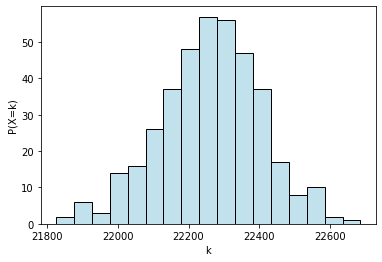

In [64]:
poisson_100ms = poisson.rvs(mu=df_100ms.mean(), size=df_100ms.size)
sns.histplot(poisson_100ms, color="lightblue")
plt.xlabel('k')
plt.ylabel('P(X=k)')

## 1 Sec

### Histogram

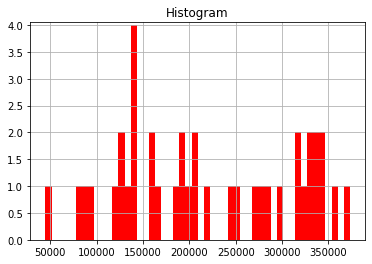

In [16]:
d1s_hx, d1s_hy, _ = plt.hist(df_1s, bins=50, color="red")

plt.ylim(0.0,max(d1s_hx)+0.05)
plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Cumulative sum function

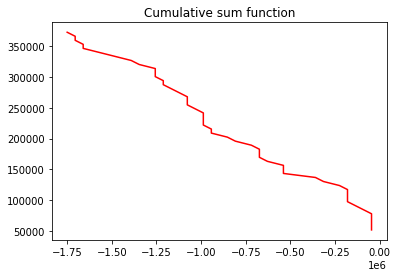

In [46]:
dx = d1s_hx[1] - d1s_hy[0]
ps_1s_cumsum = np.cumsum(d1s_hx)*dx

plt.plot(ps_1s_cumsum, d1s_hy[1:], color="red")

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Poisson

Text(0, 0.5, 'P(X=k)')

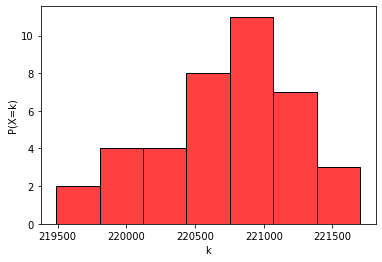

In [18]:
poisson_1s = poisson.rvs(mu=df_1s.mean(), size=df_1s.size)
sns.histplot(poisson_1s, color="red")
plt.xlabel('k')
plt.ylabel('P(X=k)')

## 10 Sec

### Histogram

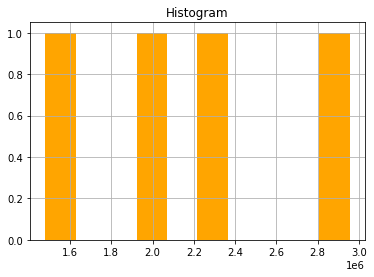

In [19]:
d10s_hx, d10s_hy, _ = plt.hist(df_10s, color="orange")

plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Cumulative sum function

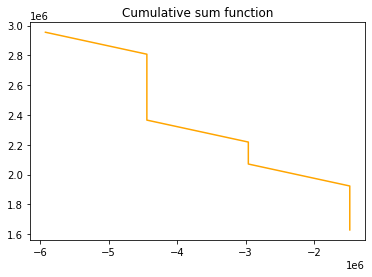

In [49]:
dx = d10s_hx[1] - d10s_hy[0]
ps_cumsum = np.cumsum(d10s_hx)*dx

plt.plot(ps_cumsum, d10s_hy[1:], color="orange")

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Poisson

Text(0, 0.5, 'P(X=k)')

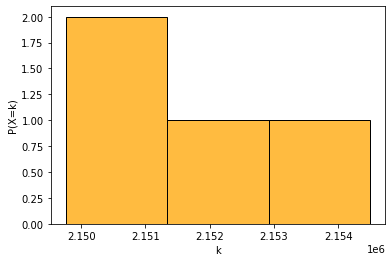

In [48]:
poisson_10s = poisson.rvs(mu=df_10s.mean(), size=df_10s.size)
sns.histplot(poisson_10s, color="orange")
plt.xlabel('k')
plt.ylabel('P(X=k)')